# Perceptron Overview

The perceptron is a fundamental unit of a neural network, often referred to as a type of linear classifier. It works by taking several binary inputs \\( x_1, x_2, \ldots, x_m \\), multiplying each by a weight \\( w_1, w_2, \ldots, w_m \\), summing them up, and then passing the sum through an activation function to produce an output.

<img src="perceptron.webp" alt="Perceptron Model" width="500"/>

The net input function is given by:

$$ z = w_0 + x_1 w_1 + x_2 w_2 + \ldots + x_m w_m $$

Where \\( w_0 \\) is the bias term.

The output of the perceptron, using the Heaviside step function as an activation function, can be written as:

$$
y = \begin{cases} 
1 & \text{if } z \geq 0 \\
-1 & \text{otherwise} 
\end{cases}
$$

During training, the perceptron adjusts its weights based on the error of the predictions. The weight update rule is:

$$ w_i = w_i + \eta (y_{\text{true}} - y_{\text{predict}}) x_i $$

Where \\( \eta \\) is the learning rate.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

## Data Preprocessing
Here we preprocess our data by selecting the first two features for simplicity and scaling them. The target variable is also adjusted to fit the perceptron's expected binary format.


In [2]:
bc = load_breast_cancer()
X_bc = bc.data[:, :2]
y_bc = bc.target
y_bc = np.where(y_bc == 0, -1, 1)

scaler = StandardScaler()
X_bc_std = scaler.fit_transform(X_bc)

## Perceptron Class Definition
This section defines the `Perceptron` class, which includes methods for training the perceptron using the input data and making predictions.


In [3]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training the Perceptron
We instantiate the Perceptron model with a specified learning rate and number of epochs, then train it on the standardized features of the Breast Cancer dataset.


In [4]:
# Instantiate and train the Perceptron
percep = Perceptron(eta=0.01, epochs=200)
percep.train(X_bc_std, y_bc)

# Predict labels on the standardized features
y_hat = percep.predict(X_bc_std)

# Check prediction accuracy
accuracy = np.mean(y_hat == y_bc)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.75%


## Model Evaluation
After training, we evaluate the perceptron's performance by calculating its accuracy on the training data. We also visualize the decision boundary and the errors over the training iterations.


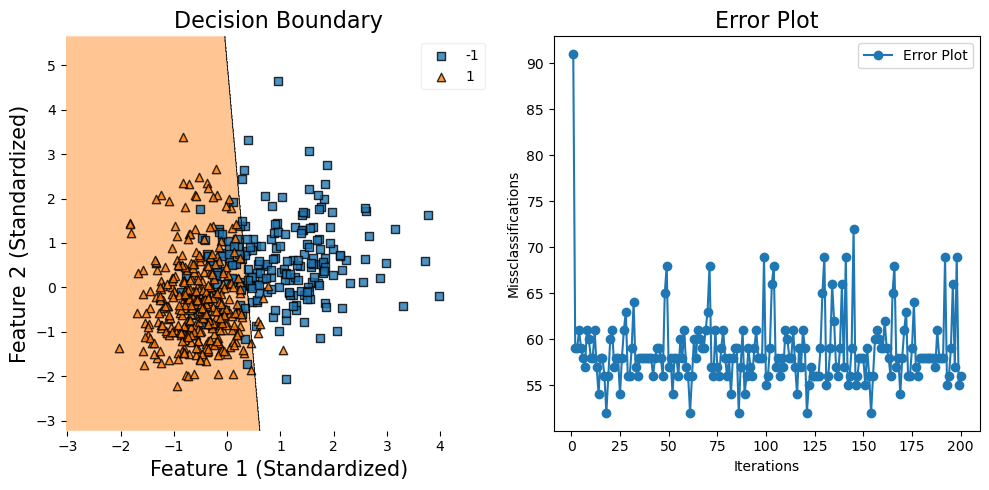

In [5]:
# Visualize the decision boundaries and error plot
plt.figure(figsize=(10, 5))

# Decision Boundary Plot
plt.subplot(1, 2, 1)
plot_decision_regions(X_bc_std, y_bc, clf=percep)
plt.xlabel("Feature 1 (Standardized)", fontsize=15)
plt.ylabel("Feature 2 (Standardized)", fontsize=15)
plt.title('Decision Boundary', fontsize=16)

# Error Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker="o", label="Error Plot")
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.title("Error Plot", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

The perceptron model trained on the Breast Cancer dataset achieved about 88.75% accuracy, which is a strong result for such a straightforward linear model. The decision boundary visualization shows that the model can generally separate the two classes well. However, the error plot suggests that not all instances are classified perfectly, indicating some potential limitations of the model due to its simplicity. Overall, the perceptron has done a commendable job, but there might be room for improvement, possibly with more complex models or by using more features from the dataset.